In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

## Loading the data

See the README.md of project-x for a key to what the columns mean

In [6]:
df = pd.read_csv('data/student-alcohol-maths.csv')
df.sample(n=10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
271,GP,F,18,U,GT3,T,2,3,other,services,...,4,5,5,1,3,2,4,15,14,14
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
85,GP,F,15,U,GT3,T,4,4,services,services,...,4,4,4,2,3,5,6,7,9,8
191,GP,F,17,U,GT3,T,1,1,at_home,services,...,5,3,3,1,1,3,0,8,8,9
79,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,4,3,1,2,3,12,5,5,5
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,6,9,8,10
305,GP,F,18,U,GT3,T,2,4,services,at_home,...,4,4,3,1,1,3,8,14,12,12
358,MS,M,18,U,LE3,T,1,1,other,services,...,3,3,2,1,2,3,4,10,10,10
188,GP,F,17,U,GT3,A,3,3,health,other,...,3,3,3,1,3,3,6,8,7,9


## Exploring the data

### High level stats

In [19]:
num_total = len(df)
num_gp = df['school'].value_counts()['GP']
num_ms = df['school'].value_counts()['MS']

print('Number of records:', num_total)
## There are two schools, is that dataset balanced by school?
print('Percent GP school: {0:.2%}'.format((num_gp / num_total)))
print('Percent MS school: {0:.2%}'.format((num_ms / num_total)))

Number of records: 395
Percent GP school: 88.35%
Percent MS school: 11.65%


Text(0.5, 0, 'consumption (1 - very low, 5 - very high)')

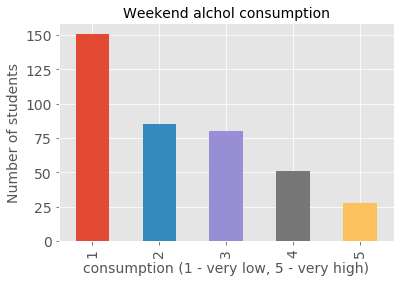

In [26]:
df['Walc'].value_counts().plot(kind='bar')
plt.title('Weekend alchol consumption')
plt.ylabel('Number of students')
plt.xlabel('consumption (1 - very low, 5 - very high)')

Text(0.5, 0, 'Address type (U: urban, R: rural)')

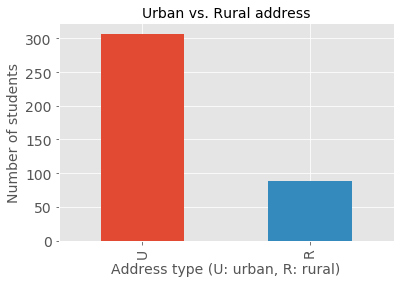

In [67]:
df['address'].value_counts().plot(kind='bar')
plt.title('Urban vs. Rural address')
plt.ylabel('Number of students')
plt.xlabel('Address type (U: urban, R: rural)')

## @MB - plot a bar chart showing number of students in each school

The above example shows how to plot a bar chart for how many people live in urban areas and how many in rural areas. Please do the same for how many students are in each school (starter code below). After choosing the correct column name, give the chart a descriptive title and axis labels.

In [ ]:
df['COLUMN_NAME_HERE'].value_counts().plot(kind='bar')
plt.title('???')
plt.ylabel('??? - y')
plt.xlabel('??? - x')

## Finding reliable trends

- Should we even up certain classes before we look for trends? We need to be careful we don't attribute a property to the whole population that is actually only prevelant in one class (an example of a "class" is the school GP or MS).

### Is there a correlation between age and weekend/weekday alcohol consumption?

Text(0.5, 1.0, 'Correlation between weekend alcohol consumption and age')

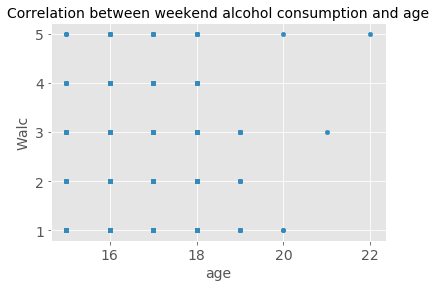

In [43]:
df[['age', 'Walc']].plot(kind='scatter', x='age', y='Walc')
plt.title('Correlation between weekend alcohol consumption and age')

### The data is categorical, so multiple points overlap...

... so we can't see any trends, solutions:
- Numerically determine the correlation
- Weight the size of the point

#### Numerically determine the correlation

In [42]:
df[['age', 'Walc', 'Dalc']].corr()

,age,Walc,Dalc
age,1.000000,0.117276,0.131125
Walc,0.117276,1.000000,0.647544
Dalc,0.131125,0.647544,1.000000


#### Weight the size of the data points for multiple occurrences

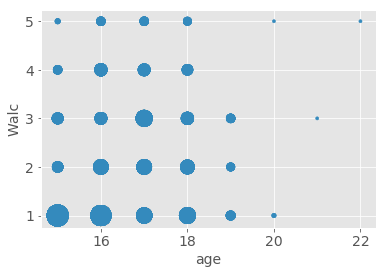

In [66]:
df2 = pd.DataFrame.copy(df[['Walc', 'age']])
sizes = df2.groupby(by=['Walc', 'age']).groups
df2['s'] = df2.apply(lambda row: len(sizes[row['Walc'], row['age']]), axis=1)
df2[['age', 'Walc']].plot(kind='scatter', x='age', y='Walc', s=df2['s']*10)